**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**Read data set**

In [2]:
df = pd.read_csv("E:/Users/USER/Desktop/DataAnalytics And gen AI/Data/ML/HRDataset_v14 (1).csv")

**Profile of data**

In [3]:
df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [5]:
df.shape

(311, 36)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

**Data preparation**

In [7]:
#1. Null values
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [8]:
df["DateofTermination"].fillna(0,inplace=True)

In [9]:
df["DateofTermination"].isnull().sum()

0

In [10]:
#2. check duplicates values
df.duplicated().sum()

0

**EDA**

Q.1. Employess with highest salary.Top 10 highest employees salary

In [11]:
df[["Employee_Name","Salary"]].sort_values(by="Salary",ascending=False)[0:10]

,Employee_Name,Salary
150,"King, Janet",250000
308,"Zamora, Jennifer",220450
131,"Houlihan, Debra",180000
96,"Foss, Jason",178000
55,"Corleone, Vito",170500
190,"Monroe, Peter",157000
240,"Roper, Katie",150290
244,"Ruiz, Ricardo",148999
243,"Roup,Simon",140920
76,"Dougall, Eric",138888


Q.2. Employees who needs special attention

In [12]:
df["PerformanceScore"].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [13]:
df[df["PerformanceScore"] == ("Needs Improvement" or "PIP")]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
23,"Blount, Dianna",10294,0,0,0,1,5,2,0,66441,...,Michael Albert,22.0,CareerBuilder,Needs Improvement,2.00,3,0,2/27/2019,2,3
53,"Cole, Spencer",10292,0,0,1,4,5,2,0,59144,...,Kissy Sullivan,20.0,LinkedIn,Needs Improvement,2.00,3,0,5/1/2016,5,16
54,"Corleone, Michael",10282,0,2,1,1,5,2,0,68051,...,Janet King,2.0,CareerBuilder,Needs Improvement,4.13,2,0,1/14/2019,3,3
73,"DiNocco, Lily",10284,1,1,0,1,5,2,0,61584,...,Brannon Miller,12.0,Indeed,Needs Improvement,3.88,4,0,1/18/2019,0,6
84,"Estremera, Miguel",10280,0,0,1,4,5,2,0,60340,...,Michael Albert,22.0,Google Search,Needs Improvement,5.00,4,0,4/12/2018,5,16
85,"Evensen, April",10296,0,0,0,4,5,2,0,59124,...,Elijiah Gray,16.0,Google Search,Needs Improvement,2.30,3,0,1/15/2017,5,19
86,"Exantus, Susan",10290,1,1,0,4,4,2,0,99280,...,Alex Sweetwater,10.0,Indeed,Needs Improvement,2.10,5,4,8/10/2012,4,19
105,"Gilles, Alex",10283,1,1,1,5,5,2,1,54933,...,Webster Butler,39.0,Diversity Job Fair,Needs Improvement,3.97,4,0,1/20/2015,3,15
137,"Immediato, Walter",10289,1,1,1,5,5,2,0,83082,...,Janet King,2.0,Indeed,Needs Improvement,2.34,2,0,4/12/2012,3,4
190,"Monroe, Peter",10288,1,1,1,1,3,2,1,157000,...,Jennifer Zamora,5.0,Diversity Job Fair,Needs Improvement,2.39,3,6,2/22/2019,4,13


Q.3. How many peoples take maximum leaves

In [14]:
df[df["Absences"] == df["Absences"].max()]["Employee_Name"]

15               Bates, Norman
93     Fitzpatrick, Michael  J
107             Givens, Myriam
109                Goeth, Amon
114                Good, Susan
121            Guilianno, Mike
123           Hankard, Earnest
155            Kreuger, Freddy
158          Langford, Lindsey
161            Latif, Mohammed
164        LeBlanc, Brandon  R
183             Mckenna, Sandy
256           Sloan, Constance
263           Sparks, Taylor  
Name: Employee_Name, dtype: object

In [15]:

df["Absences"].value_counts(normalize=True)*100

Absences
4     7.395498
16    7.395498
7     6.752412
2     6.752412
15    6.430868
13    5.466238
14    5.466238
3     5.144695
19    5.144695
6     5.144695
11    4.823151
17    4.823151
1     4.501608
20    4.501608
9     4.501608
5     3.858521
8     3.536977
10    3.215434
12    2.572347
18    2.572347
Name: proportion, dtype: float64

In [16]:
#Highest number of leaves taken is 20 by 4.5% of employee

Q.4. How many employees are married or not?

In [17]:
"""1 => Married
   0 => Unmarried"""

print(len(df[df["MarriedID"] == 1])," Employees are Married")

124  Employees are Married


In [18]:
df["MarriedID"].value_counts(normalize=True)*100

MarriedID
0    60.128617
1    39.871383
Name: proportion, dtype: float64

In [19]:
#Almost 60% employees are Unmarried and 40% employees are married

Q.5. How many married peoples are includes in most absence list 

In [20]:
df[(df["Absences"] == df["Absences"].max()) & (df["MarriedID"] == 1)]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
109,"Goeth, Amon",10228,1,1,1,1,3,3,0,74679,...,Peter Monroe,7.0,LinkedIn,Fully Meets,4.30,5,7,1/10/2019,0,20
114,"Good, Susan",10237,1,1,0,3,5,3,0,66825,...,David Stanley,14.0,LinkedIn,Fully Meets,4.60,3,0,2/7/2019,0,20
161,"Latif, Mohammed",10249,1,1,1,5,5,3,0,61962,...,Kissy Sullivan,20.0,Google Search,Fully Meets,4.90,3,0,2/20/2013,0,20
164,"LeBlanc, Brandon R",10134,1,1,1,1,1,3,0,93046,...,Janet King,2.0,CareerBuilder,Fully Meets,4.10,4,0,1/28/2019,0,20
183,"Mckenna, Sandy",10145,1,1,0,1,5,3,0,62810,...,Kissy Sullivan,20.0,CareerBuilder,Fully Meets,3.93,3,0,1/30/2019,0,20
263,"Sparks, Taylor",10302,1,1,0,1,5,1,0,64021,...,Brannon Miller,12.0,Indeed,PIP,2.40,2,1,2/25/2019,6,20


In [21]:
print(len(df[(df["Absences"] == df["Absences"].max()) & (df["MarriedID"] == 1)]),"employees are married whos are take maximum leaves")

6 employees are married whos are take maximum leaves


Q.6.Which people does not have special project

In [22]:
df["SpecialProjectsCount"].unique()

array([0, 6, 4, 5, 7, 3, 8, 2, 1], dtype=int64)

In [23]:
df[df["SpecialProjectsCount"] == 0]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7
305,"Wolk, Hang T",10174,0,0,0,1,5,3,0,60446,...,David Stanley,14.0,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0,14
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4


In [24]:
df[df["SpecialProjectsCount"] != 0]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16
12,"Barbossa, Hector",10012,0,2,1,1,3,4,1,92328,...,Simon Roup,4.0,Diversity Job Fair,Exceeds,4.28,4,5,2/25/2019,0,9
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,...,Simon Roup,4.0,Google Search,Fully Meets,4.50,4,5,1/15/2015,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,"Voldemort, Lord",10118,1,1,1,4,3,3,0,113999,...,Simon Roup,4.0,Employee Referral,Fully Meets,4.33,3,7,2/15/2017,0,9
298,"Wang, Charlie",10172,0,0,1,1,3,3,0,84903,...,Brian Champaigne,13.0,Indeed,Fully Meets,3.42,4,7,1/4/2019,0,17
299,"Warfield, Sarah",10127,0,4,0,1,3,3,0,107226,...,Peter Monroe,7.0,Employee Referral,Fully Meets,4.20,4,8,2/5/2019,0,7
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


In [28]:
#Visualisation
#Q.7. Top 10 highest salary VS lowest 10 salary

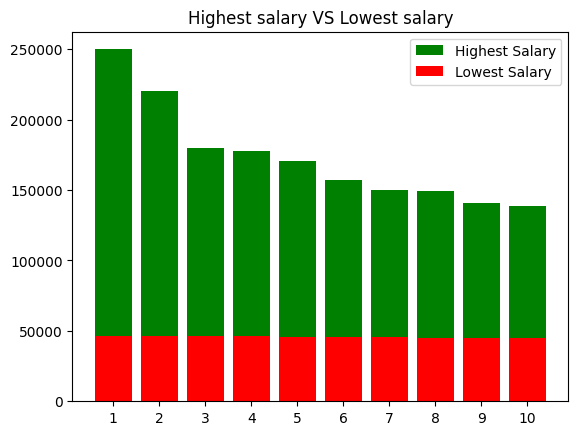

In [26]:
c = [1,2,3,4,5,6,7,8,9,10]

y1 = df["Salary"].sort_values(ascending=False).head(10)
y2 = df["Salary"].sort_values(ascending=False).tail(10)

plt.bar(c,height=y1,color="g",label="Highest Salary")
plt.bar(c,height=y2,color='r',label="Lowest Salary")

plt.title("Highest salary VS Lowest salary")
plt.xticks(c)
plt.legend()
plt.show()

In [27]:
#Lowest salary are very closed each other but highest salary varies a lot

Q.8. Recruitment process

In [30]:
df["RecruitmentSource"].value_counts()

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

In [32]:
df["RecruitmentSource"].value_counts(normalize=True)*100

RecruitmentSource
Indeed                     27.974277
LinkedIn                   24.437299
Google Search              15.755627
Employee Referral           9.967846
Diversity Job Fair          9.324759
CareerBuilder               7.395498
Website                     4.180064
Other                       0.643087
On-line Web application     0.321543
Name: proportion, dtype: float64

In [33]:
#Most of people are being hired by indeed platfrom(27.9%)

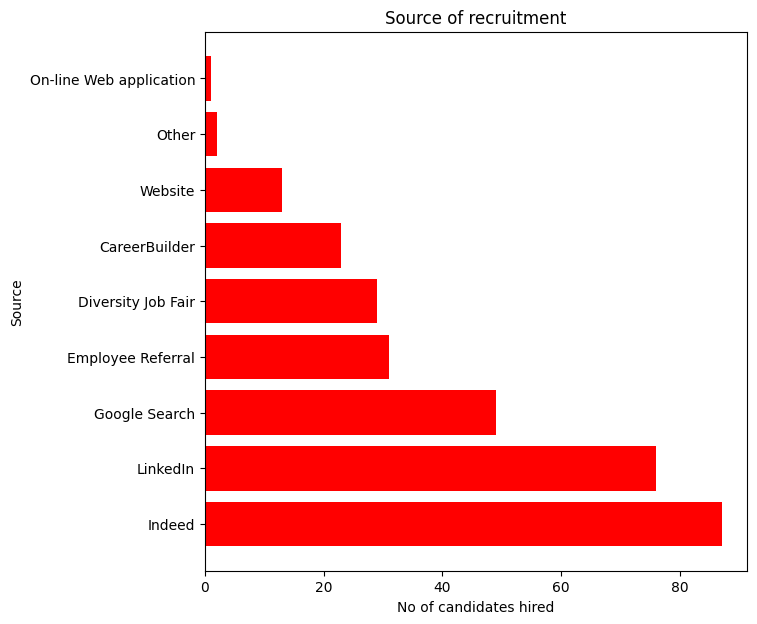

In [51]:
#Make bar plot for better visulazation
l = df["RecruitmentSource"].value_counts()
plt.figure(figsize=(7,7))
plt.barh(l.index,l,color="r")
plt.title("Source of recruitment")
plt.xlabel("No of candidates hired")
plt.ylabel("Source")
plt.show()

Q.9. Make a line chart to show employees performance

In [62]:
df["PerformanceScore"].value_counts()

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

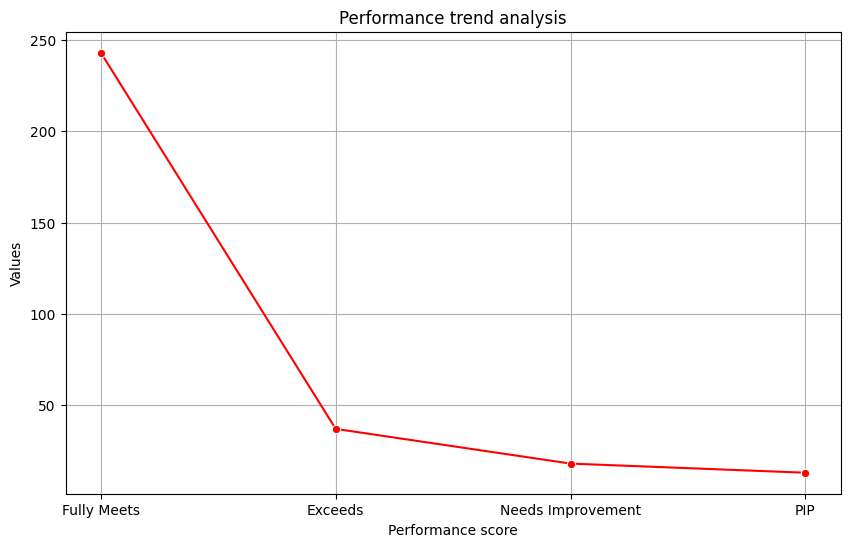

In [61]:
z = df["PerformanceScore"].value_counts()
plt.figure(figsize=(10,6))

sns.lineplot(data=z, marker ='o',color="r")

plt.title("Performance trend analysis")
plt.xlabel("Performance score")
plt.ylabel("Values")
plt.grid()
plt.show()

In [ ]:
#insights: Mostly score 50-250

Q.10. Works on Employee satisfaction

In [64]:
df["EmpSatisfaction"].value_counts()  #Scale range 1 to 5

EmpSatisfaction
3    108
5     98
4     94
2      9
1      2
Name: count, dtype: int64

In [ ]:
#Which two people are rated by 1 rating score

In [65]:
df[df["EmpSatisfaction"] == 1]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
72,"Dietrich, Jenna",10304,0,0,0,1,6,1,0,59231,...,John Smith,17.0,Website,PIP,2.3,1,0,1/29/2019,2,17
83,"Erilus, Angela",10299,0,3,0,1,5,1,0,56847,...,Michael Albert,22.0,Indeed,PIP,3.0,1,0,2/25/2019,2,5


Text(0.5, 1.0, 'Rating')

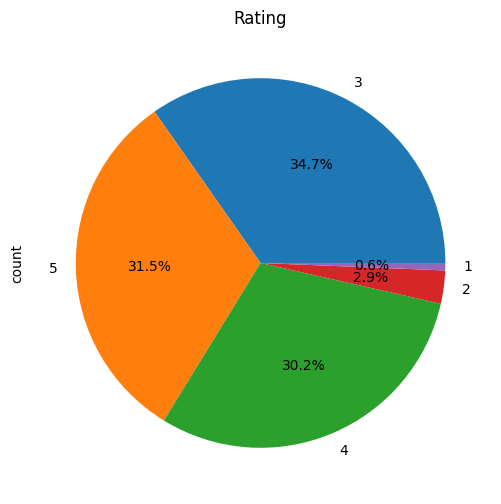

In [75]:
#Pie chart on value counts(Rating)
plt.figure(figsize=(6,6))
df["EmpSatisfaction"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Rating")

In [ ]:
#Insights: The most common rating is 3

**Multi-Variate analysis**

Q.11. Outliers in salary column with respect to each department

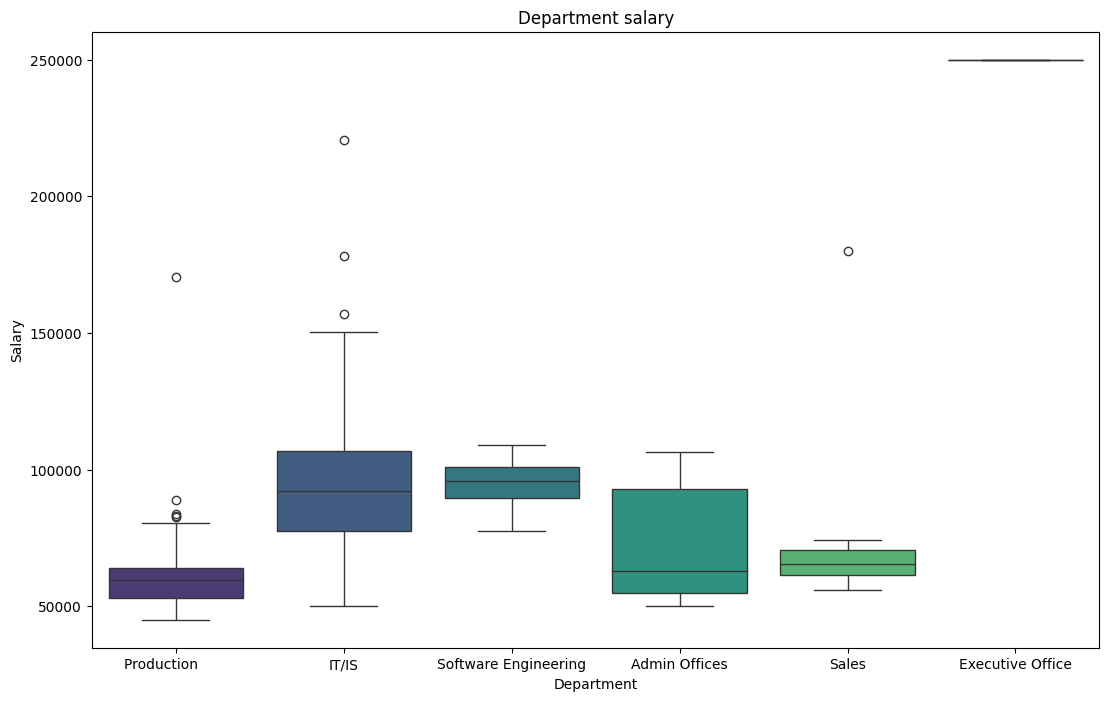

In [82]:
plt.figure(figsize=(13,8))

sns.boxplot(data=df,x="Department",y="Salary",palette="viridis")
plt.title("Department salary")
plt.show()

In [ ]:
#insights: Executive are paid highest salary
#        : Least salary in production department
#        : In "Software Engineering" and "Admin offices" department there have't any outliers

Q.12. For different positions plot the engagement survey

In [83]:
df["Position"].unique()

array(['Production Technician I', 'Sr. DBA', 'Production Technician II',
       'Software Engineer', 'IT Support', 'Data Analyst',
       'Database Administrator', 'Enterprise Architect', 'Sr. Accountant',
       'Production Manager', 'Accountant I', 'Area Sales Manager',
       'Software Engineering Manager', 'BI Director',
       'Director of Operations', 'Sr. Network Engineer', 'Sales Manager',
       'BI Developer', 'IT Manager - Support', 'Network Engineer',
       'IT Director', 'Director of Sales', 'Administrative Assistant',
       'President & CEO', 'Senior BI Developer',
       'Shared Services Manager', 'IT Manager - Infra',
       'Principal Data Architect', 'Data Architect', 'IT Manager - DB',
       'Data Analyst ', 'CIO'], dtype=object)

In [89]:
df["EngagementSurvey"].unique() #Range is between 1 to 5

array([4.6 , 4.96, 3.02, 4.84, 5.  , 3.04, 4.46, 4.2 , 4.28, 4.4 , 4.5 ,
       2.  , 4.8 , 3.5 , 3.39, 3.35, 3.19, 3.14, 4.51, 3.25, 3.84, 4.43,
       3.3 , 3.8 , 3.  , 4.3 , 3.58, 4.7 , 4.1 , 4.13, 3.7 , 4.73, 4.12,
       4.62, 3.1 , 3.96, 3.79, 1.93, 1.12, 3.01, 2.3 , 3.88, 3.4 , 4.11,
       4.77, 4.52, 2.9 , 2.1 , 4.  , 3.13, 1.56, 1.2 , 4.76, 3.66, 3.73,
       4.24, 3.97, 3.9 , 4.61, 4.63, 4.64, 4.17, 3.6 , 3.03, 4.48, 3.24,
       3.72, 2.34, 3.99, 3.75, 3.07, 4.83, 3.49, 3.38, 3.65, 4.78, 4.9 ,
       4.88, 4.53, 3.18, 4.65, 3.08, 3.93, 4.18, 4.37, 2.39, 3.81, 4.29,
       2.33, 4.25, 3.89, 3.54, 2.4 , 3.45, 4.16, 3.17, 4.15, 3.98, 4.36,
       3.69, 4.94, 2.6 , 3.51, 3.31, 4.81, 3.32, 4.68, 3.27, 1.81, 4.21,
       2.44, 2.81, 4.33, 3.21, 3.11, 2.5 , 3.42, 4.07, 3.2 ])

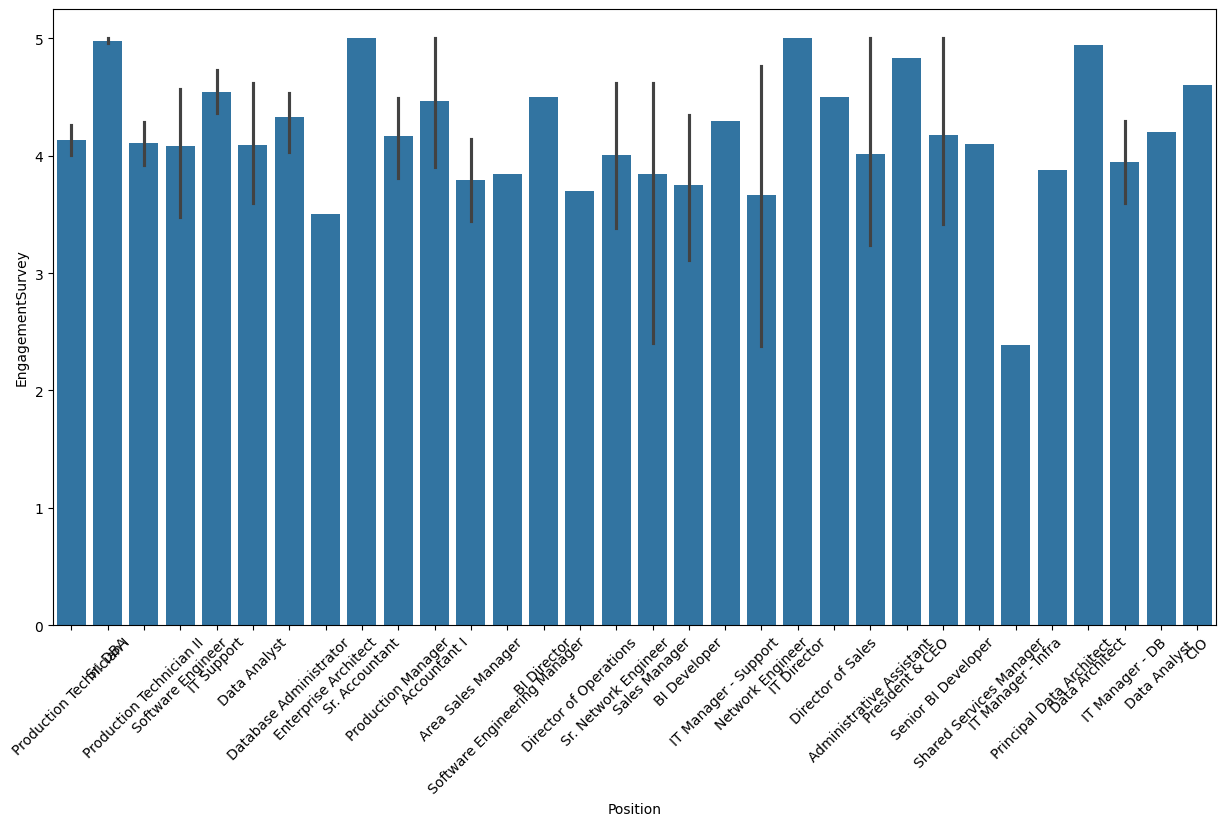

In [93]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x="Position",y="EngagementSurvey")
plt.xticks(rotation=45)
plt.show()

Q.13. Number of employee in each marital status

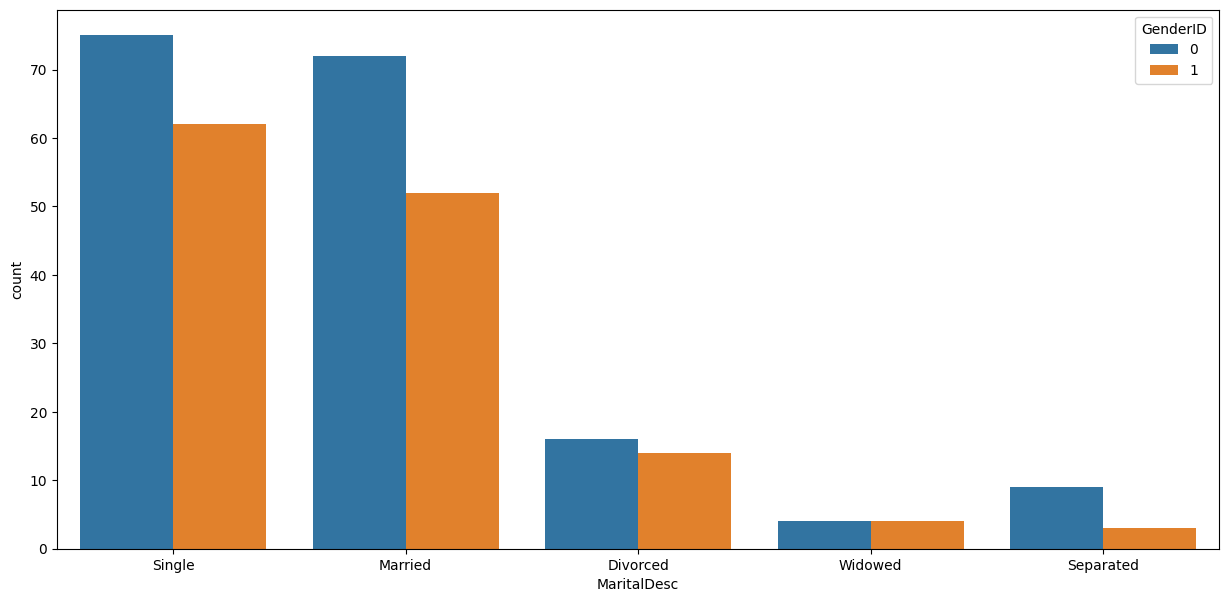

In [101]:
plt.figure(figsize=(15,7))

sns.countplot(data=df,x="MaritalDesc",hue="GenderID")
plt.show()

In [102]:
#Insights: Most of the male are single,married,Divorced and separated

Q.14. What is the avg enagement score for employees in each department

In [109]:
df.groupby(df["Department"])["EngagementSurvey"].mean().sort_values(ascending=False)

Department
Executive Office        4.830000
Admin Offices           4.393333
IT/IS                   4.154000
Production              4.129569
Software Engineering    4.061818
Sales                   3.818710
Name: EngagementSurvey, dtype: float64

In [110]:
#Insights: Excutive office has the highest engagement surveys

Q.15. How many employees have been terminated for each position

In [123]:
# Termd = 0 means still employed

In [128]:
df_term = df[df["Termd"] == 1]

df_term.groupby("Position")["Termd"].count()

Position
Administrative Assistant     2
Area Sales Manager           4
Data Analyst                 1
Data Analyst                 1
Database Administrator       3
Enterprise Architect         1
IT Manager - DB              1
Network Engineer             1
Principal Data Architect     1
Production Manager           5
Production Technician I     52
Production Technician II    26
Sales Manager                1
Software Engineer            4
Sr. DBA                      1
Name: Termd, dtype: int64

Q.16. How many employees have been terminated for each reson

In [131]:
df_term.groupby("TermReason")["Termd"].count()

TermReason
Another position                    20
Fatal attraction                     1
Learned that he is a gangster        1
attendance                           7
career change                        9
gross misconduct                     1
hours                                8
maternity leave - did not return     3
medical issues                       3
military                             4
more money                          11
no-call, no-show                     4
performance                          4
relocation out of area               5
retiring                             4
return to school                     5
unhappy                             14
Name: Termd, dtype: int64